In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
import wordfreq

In [26]:
df = pd.read_csv("data/combined/filtered_combined.csv", index_col = 0)
df.reset_index(inplace=True)
df.drop(columns="index",inplace=True)

In [4]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

glove_file = datapath('C:/SOTA/glove/glove.6B.300d.txt')
tmp_file = get_tmpfile('W2V.txt')

_ = glove2word2vec(glove_file, tmp_file)

model = KeyedVectors.load_word2vec_format(tmp_file)


In [27]:
annot_std_semantic = df[(df['bleu_score_1'] > 0.8) & (df['dif_sent'] > 1.9)].groupby('annotator')['label'].std().dropna()
ba_semantics = list(annot_std_semantic[annot_std_semantic > 1.0].index)

In [30]:
#skinny_df = df[df.annotator.apply(lambda x: x not in ba_semantics)]
skinny_df = pd.read_csv("data/combined/skinny_df_metrics.csv", index_col = 0)

In [31]:
import src

In [32]:
skinny_df.head()

,annotator,text_1,text_2,label,dataset,random,duration,total_seconds,pair_id,reduced_label,...,sentiment_1,sentiment_2,dif_sent,bleu_score_1,chrfScore,1-gram_overlap,2-gram_overlap,3-gram_overlap,WMD,POS dist score
0,A3SQ00HYQN7FYB,"And he sent Eliakim , who was over the househo...","And he sent Eliakim , who was over the house ,...",3,bible_human,0,0 days 00:00:12.000000000,12,pair_0,0,...,-0.970466,0.556437,1.526903,0.777466,0.699194,0.739130,0.642857,0.555556,0.541918,1.864634
1,A168NGIUW93RV5,"The word of the Lord which came to Joel , the ...",The word of the Lord that came to Joel the son...,4,bible_human,0,0 days 00:00:20.000000000,20,pair_3,1,...,0.956103,0.952563,0.003540,0.798054,0.653305,0.818182,0.750000,0.636364,0.865863,0.000000
2,A2Z5WHZ0A2JJ6A,"Adam , Seth , Enosh ,","Adam , Seth , Enosh ,",5,bible_human,0,0 days 00:00:13.000000000,13,pair_4,1,...,0.997491,0.997491,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-1.000000
3,A351BKQC7NEH3A,"Adam , Seth , Enosh ,","Adam , Seth , Enosh ,",5,bible_human,0,0 days 00:00:06.000000000,6,pair_4,1,...,0.997491,0.997491,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-1.000000
5,A3S104I5V53HB8,having become by so much better than the angel...,taking a place by so much better than the ange...,4,bible_human,0,0 days 00:00:05.000000000,5,pair_5,1,...,0.995914,0.998988,0.003074,0.809524,0.682740,0.800000,0.555556,0.411765,0.723607,0.000000


In [34]:
glove = {}
i=0
with open("C:/SOTA/glove/glove.6B.300d.txt",encoding="utf8") as f:
    for line in f:
        key = line.split()[0]
        val = [eval(num) for num in line.split()[1:]]
        glove[key] = val
        i+=1

In [35]:
chr = src.chrFScore()
n3 = src.NgramOverlap(3)
pos = src.POSDistance(dic_glove=glove)
elmo = src.EuclideanElmoDistance()
wmd = src.WMD(path = 'C:/SOTA/glove/W2V.txt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hman1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hman1\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [39]:
mini = skinny_df.iloc[:3]
mini = mini.rename(columns = {'text1':'text_1',
                        'text2':'text_2'})
skinny_df=skinny_df.rename(columns = {'text1':'text_1',
                        'text2':'text_2'})
df=df.rename(columns = {'text1':'text_1',
                        'text2':'text_2'})


In [41]:
elmo.run(mini)

100%|██████████| 3/3 [00:00<00:00,  3.23it/s]


,annotator,text_1,text_2,label,dataset,random,duration,total_seconds,pair_id,reduced_label,...,sentiment_2,dif_sent,bleu_score_1,chrfScore,1-gram_overlap,2-gram_overlap,3-gram_overlap,WMD,POS dist score,L2_score
0,A3SQ00HYQN7FYB,"And he sent Eliakim , who was over the househo...","And he sent Eliakim , who was over the house ,...",3,bible_human,0,0 days 00:00:12.000000000,12,pair_0,0,...,0.556437,1.526903,0.777466,0.699194,0.739130,0.642857,0.555556,0.541918,1.864634,0.198968
1,A168NGIUW93RV5,"The word of the Lord which came to Joel , the ...",The word of the Lord that came to Joel the son...,4,bible_human,0,0 days 00:00:20.000000000,20,pair_3,1,...,0.952563,0.003540,0.798054,0.653305,0.818182,0.750000,0.636364,0.865863,0.000000,0.449346
2,A2Z5WHZ0A2JJ6A,"Adam , Seth , Enosh ,","Adam , Seth , Enosh ,",5,bible_human,0,0 days 00:00:13.000000000,13,pair_4,1,...,0.997491,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,0.720069


In [42]:
scores = elmo.run(skinny_df.groupby('pair_id').first())


100%|██████████| 12222/12222 [48:03<00:00,  4.24it/s]


In [45]:
skinny_df = skinny_df.join(scores['L2_score'], on = 'pair_id')


In [46]:
skinny_df.head()

,annotator,text_1,text_2,label,dataset,random,duration,total_seconds,pair_id,reduced_label,...,sentiment_2,dif_sent,bleu_score_1,chrfScore,1-gram_overlap,2-gram_overlap,3-gram_overlap,WMD,POS dist score,L2_score
0,A3SQ00HYQN7FYB,"And he sent Eliakim , who was over the househo...","And he sent Eliakim , who was over the house ,...",3,bible_human,0,0 days 00:00:12.000000000,12,pair_0,0,...,0.556437,1.526903,0.777466,0.699194,0.739130,0.642857,0.555556,0.541918,1.864634,0.272332
1,A168NGIUW93RV5,"The word of the Lord which came to Joel , the ...",The word of the Lord that came to Joel the son...,4,bible_human,0,0 days 00:00:20.000000000,20,pair_3,1,...,0.952563,0.003540,0.798054,0.653305,0.818182,0.750000,0.636364,0.865863,0.000000,0.196844
2,A2Z5WHZ0A2JJ6A,"Adam , Seth , Enosh ,","Adam , Seth , Enosh ,",5,bible_human,0,0 days 00:00:13.000000000,13,pair_4,1,...,0.997491,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,0.984435
3,A351BKQC7NEH3A,"Adam , Seth , Enosh ,","Adam , Seth , Enosh ,",5,bible_human,0,0 days 00:00:06.000000000,6,pair_4,1,...,0.997491,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,0.984435
5,A3S104I5V53HB8,having become by so much better than the angel...,taking a place by so much better than the ange...,4,bible_human,0,0 days 00:00:05.000000000,5,pair_5,1,...,0.998988,0.003074,0.809524,0.682740,0.800000,0.555556,0.411765,0.723607,0.000000,0.679747


In [23]:
#chr.run(skinny_df)
#n3.run(skinny_df)
#wmd.run(skinny_df)
#pos.run(skinny_df)
elmo.run(skinny_df)

NameError: name 'elmo' is not defined

In [47]:
skinny_df.to_csv('data/combined/skinny_df_metrics.csv')

In [49]:
#chr.run(df)
#n3.run(df)
#wmd.run(df)
#pos.run(df)
#elmo.run(df)

df.to_csv('data/combined/filtered_metrics.csv')

In [48]:
df = df.join(scores['L2_score'], on = 'pair_id')


In [99]:
elmo.run(mini)

,annotator,text_1,text_2,label,dataset,random,duration,total_seconds,pair_id,reduced_label,...,sentiment_2,dif_sent,bleu_score_1,chrfScore,1-gram_overlap,2-gram_overlap,3-gram_overlap,WMD,POS dist score,L2_score
0,A3SQ00HYQN7FYB,"And he sent Eliakim , who was over the househo...","And he sent Eliakim , who was over the house ,...",3,bible_human,0,0 days 00:00:12.000000000,12,pair_0,0,...,0.556437,1.526903,0.777466,0.699194,0.739130,0.642857,0.555556,0.541918,1.864634,0.000053
1,A168NGIUW93RV5,"The word of the Lord which came to Joel , the ...",The word of the Lord that came to Joel the son...,4,bible_human,0,0 days 00:00:20.000000000,20,pair_3,1,...,0.952563,0.003540,0.798054,0.653305,0.818182,0.750000,0.636364,0.865863,0.000000,0.449442
2,A2Z5WHZ0A2JJ6A,"Adam , Seth , Enosh ,","Adam , Seth , Enosh ,",5,bible_human,0,0 days 00:00:13.000000000,13,pair_4,1,...,0.997491,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,0.720069


In [7]:
skinny_df[skinny_df.random==0].label.describe()

count    11525.000000
mean         3.414403
std          1.366049
min          1.000000
25%          2.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: label, dtype: float64

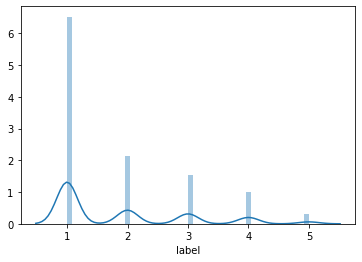

In [13]:
import seaborn as sns
sns.distplot(skinny_df[skinny_df.random==1].label)

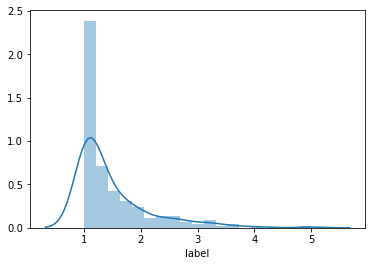

In [17]:
sns.distplot(skinny_df[skinny_df.random==1].groupby('annotator')['label'].mean())

In [19]:
(skinny_df[skinny_df.random==1].groupby('annotator')['label'].mean()>1.5).mean()

0.29767441860465116

In [ ]:
skinny_df.groupby(['pair_id','random']).size().value_counts()